In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#import xgboost
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
#from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('droupout.csv', index_col=None)

# Project Overview

Our project aims to contribute to the mitigation of academic failure in higher education by employing machine learning techniques to identify students at risk of dropout at an early stage in their academic journey. The project involves utilizing a dataset from a higher education institution, encompassing information available at the time of student enrollment, including academic paths, demographics, and socio-economic factors. The task is formulated as a classification problem, with a notable imbalance towards one of the classes. We explore algorithms for promoting class balance through synthetic oversampling and train and evaluate classification models using both conventional machine learning algorithms such as random forest and cutting-edge boosting algorithms evolving ensembles. Key stakeholders in this endeavor include educators, administrators, and policymakers, as early identification of at-risk students allows for the implementation of targeted support strategies. Machine learning proves to be an ideal approach for its capability to analyze complex patterns within diverse datasets, offering valuable insights that can inform proactive interventions and ultimately enhance student success rates. 

# EDA

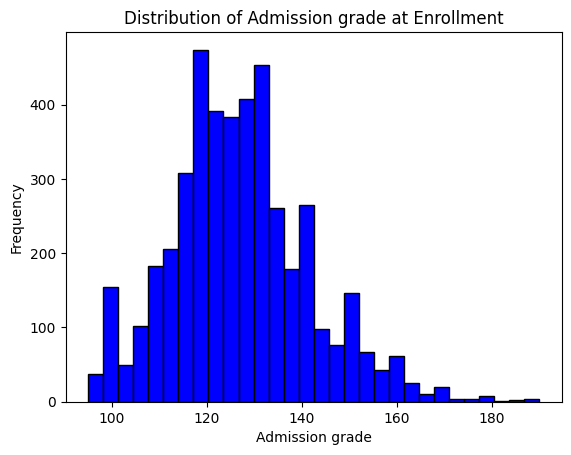

In [ ]:
plt.hist(df['Admission grade'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Admission grade at Enrollment')
plt.xlabel('Admission grade')
plt.ylabel('Frequency')
plt.show()

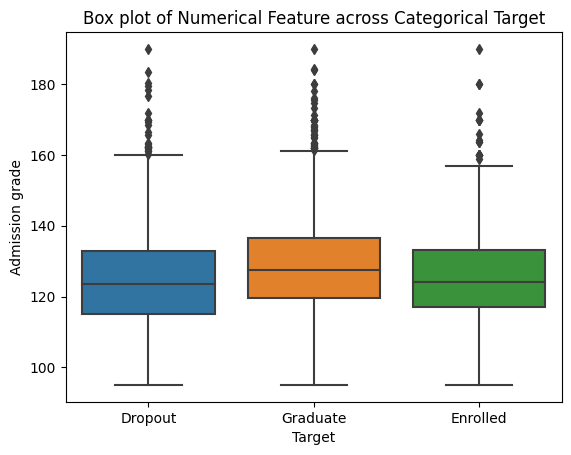

In [ ]:
sns.boxplot(x='Target', y='Admission grade', data=df)
plt.title('Box plot of Numerical Feature across Categorical Target')
plt.show()

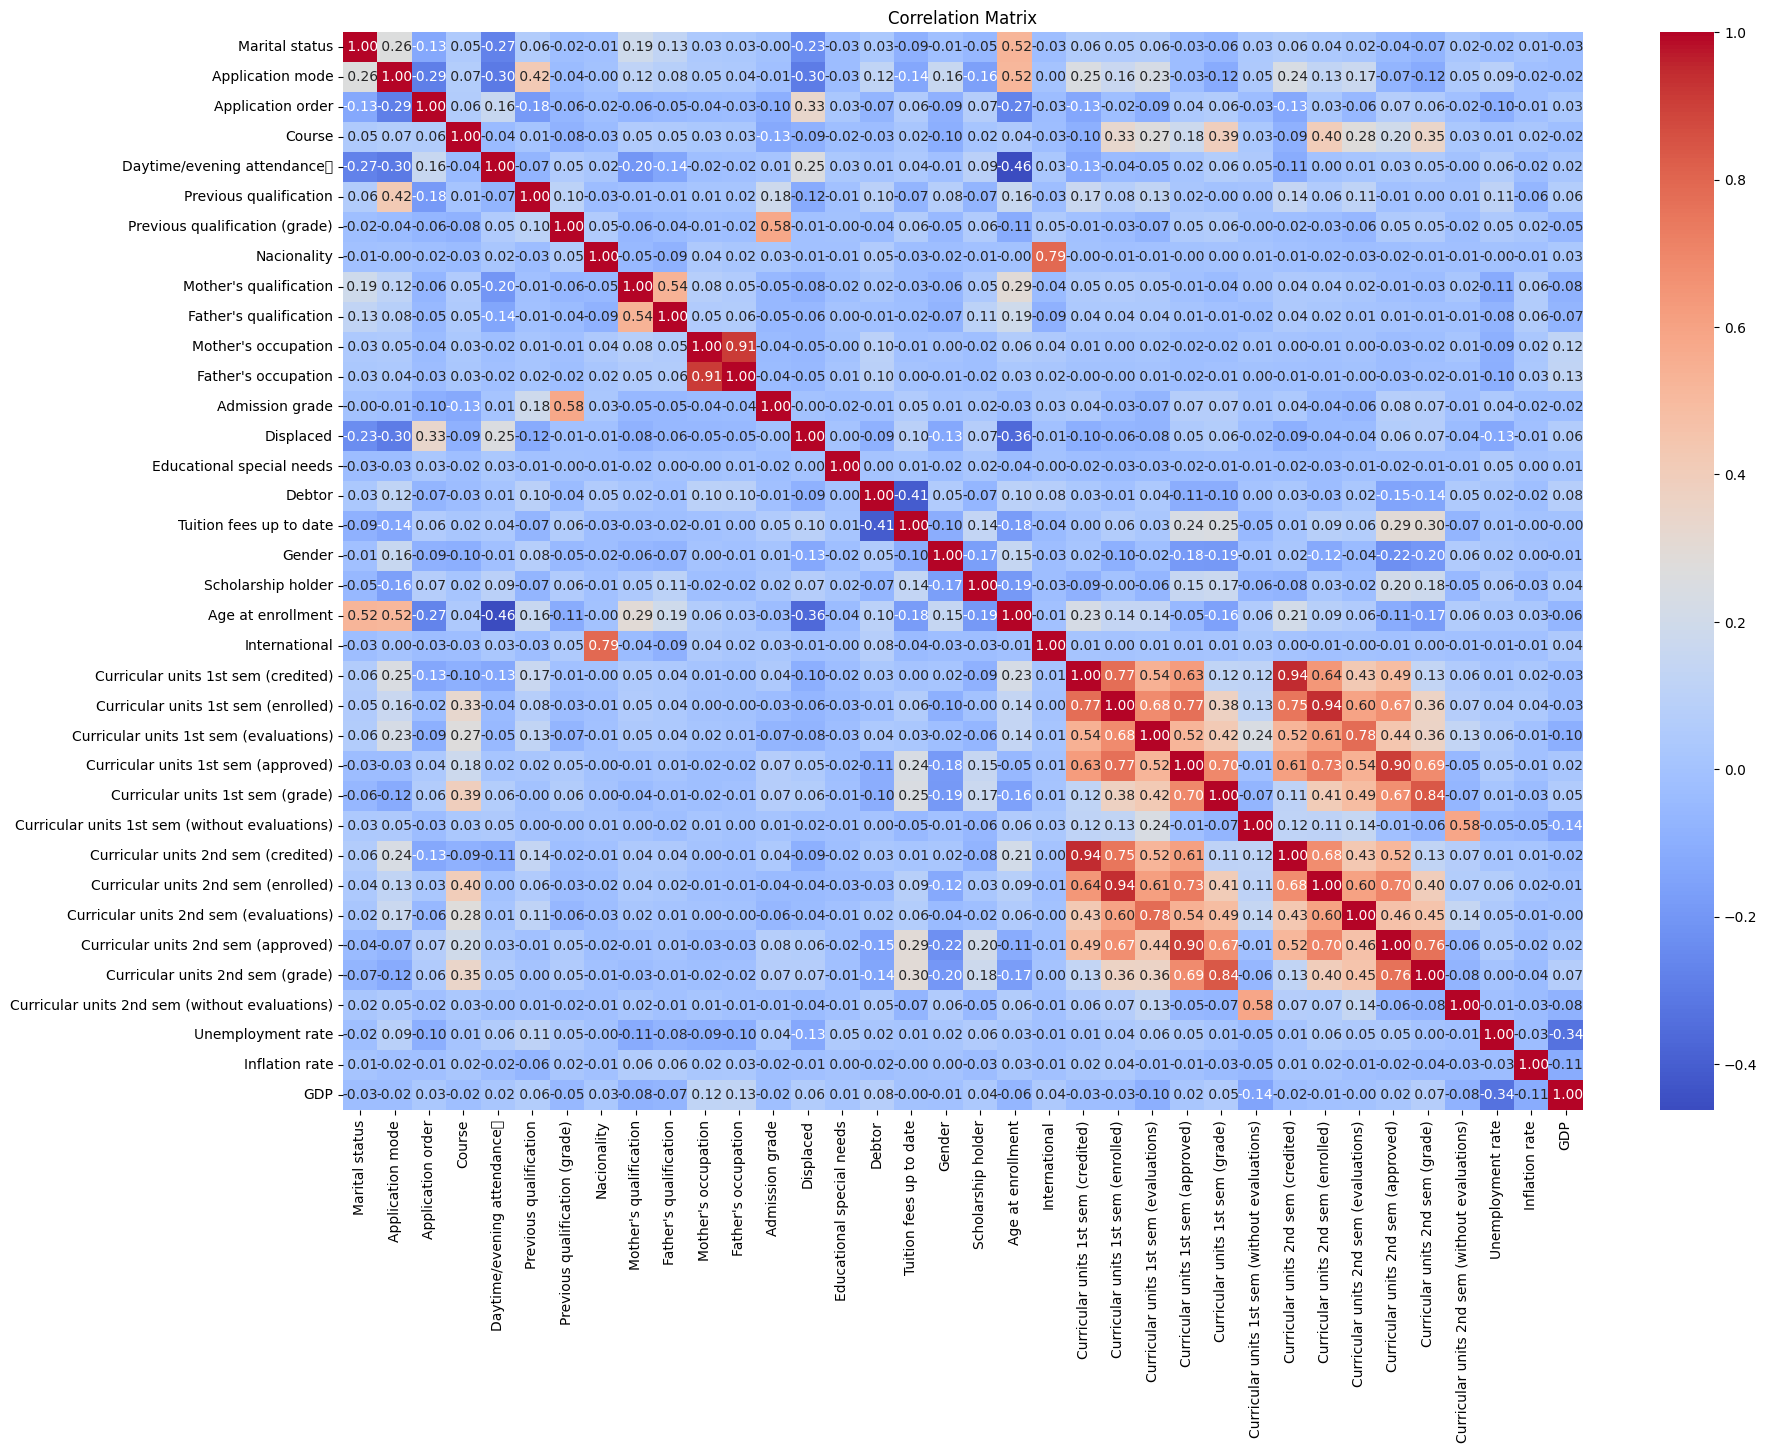

In [ ]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Correlation Matrix')
plt.show()

## Stakeholder #1: Admissions Office

Objective: Identify patterns and risk factors contributing to dropout rates to implement preventive strategies.
Analysis Focus: School-wide data trends, effectiveness of existing programs, resource allocation.
Prediction Use: Forecast dropout rates to plan interventions, allocate resources, and assess the effectiveness of educational policies and initiatives.
Communication: Present data-driven insights and actionable recommendations. Use visualizations to highlight key trends and areas requiring attention.

In [ ]:
curriculum_data = df[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']]
curriculum_data

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0
1,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0
2,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0
3,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0
4,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0
4420,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0
4421,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0
4422,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0


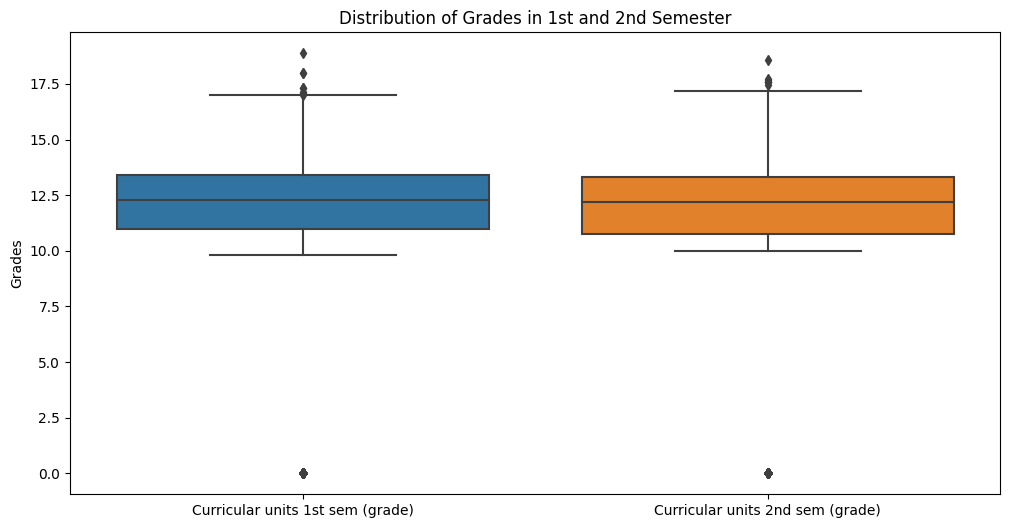

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=curriculum_data[['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']])
plt.title('Distribution of Grades in 1st and 2nd Semester')
plt.ylabel('Grades')
plt.show()

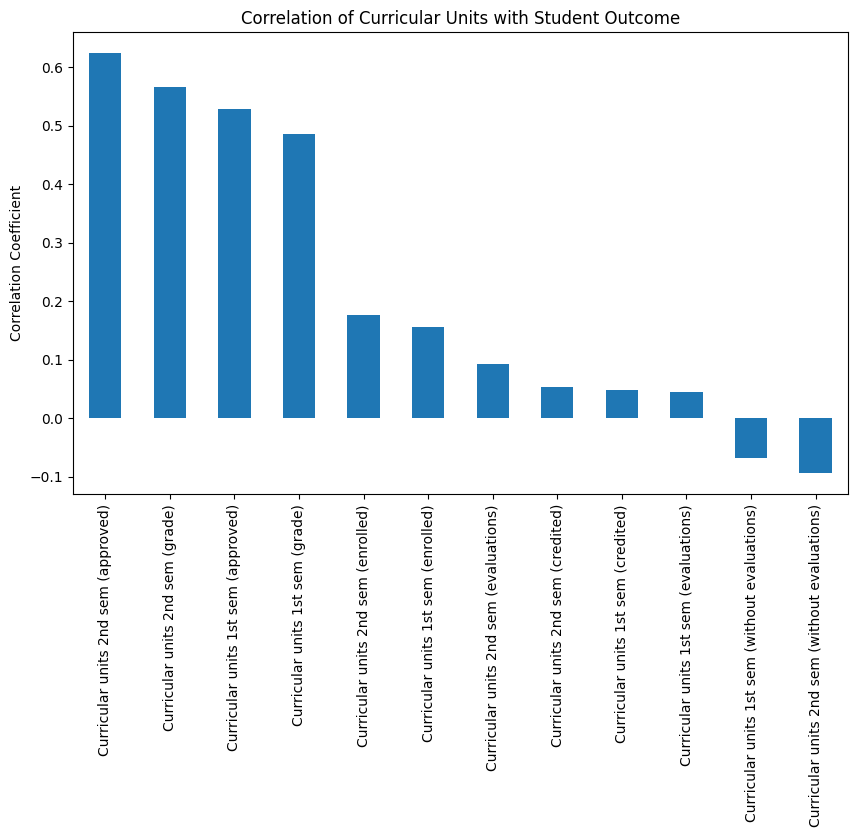

In [ ]:
curriculum_target_data = df[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
       'Target']]

curriculum_target_data['Target_numerical'] = curriculum_target_data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})
correlations = curriculum_target_data.corr()['Target_numerical'].sort_values(ascending=False)
correlations = correlations.drop('Target_numerical')

plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation of Curricular Units with Student Outcome')
plt.ylabel('Correlation Coefficient')
plt.show()

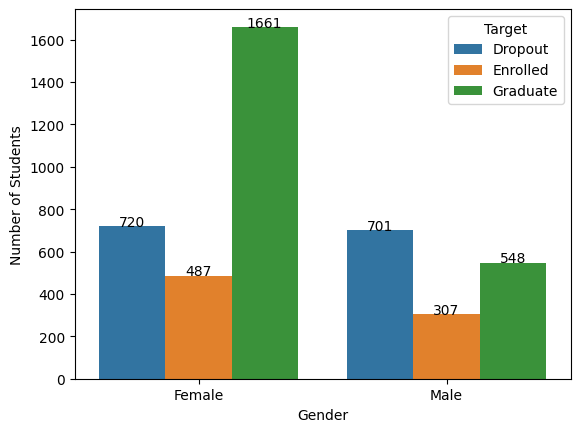

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

# Calculate totals for each 'Gender' category
gender_totals = df['Gender'].value_counts().sort_index()

# Annotate each bar with percentage
for p in ax.patches:
    count = p.get_height()
    #gender = p.get_x()
    #percentage = 100 * count / gender_totals.iloc[gender.]
    # Annotate the bar
    ax.text(p.get_x() + p.get_width() / 2.,
            p.get_y() + p.get_height(),
            int(count),
            ha="center")

plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('Number of Students')
plt.show()

Text(0.5, 1.0, 'Enrollment Status by Gender')

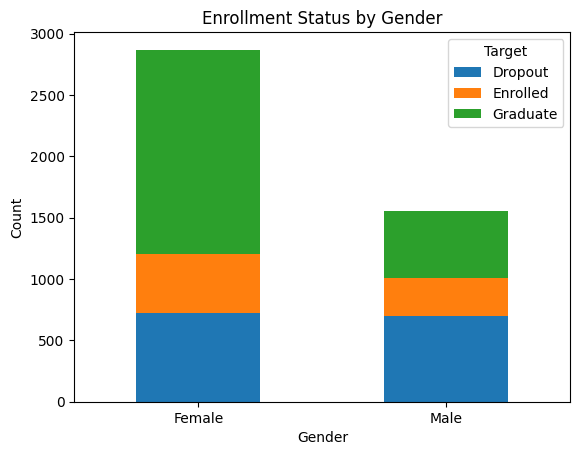

In [ ]:
gender_count = df.groupby(['Gender', 'Target']).size().unstack(fill_value = 0)
gender_count.plot(kind = "bar", stacked = True)
plt.xticks(ticks=[0,1], labels=['Female','Male'],rotation = 0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Enrollment Status by Gender')

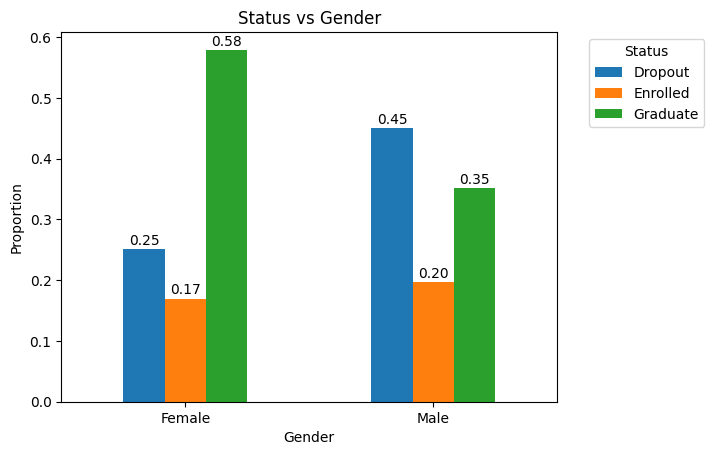

In [ ]:
gender_prop = gender_count.div(gender_count.sum(axis=1), axis=0)
gender_prop.plot(kind = "bar")

plt.xticks(ticks=[0,1], labels=['Female','Male'],rotation = 0)
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Status vs Gender')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points')

plt.show()

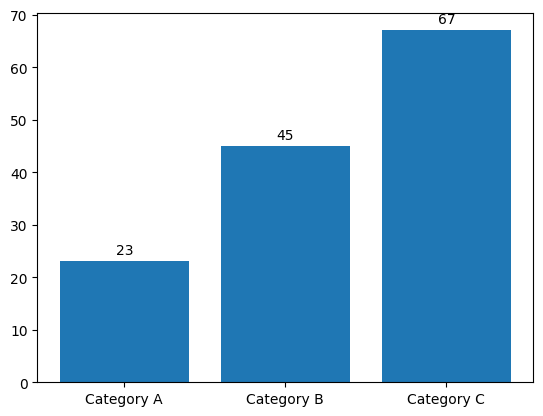

In [ ]:
# Sample data
categories = ['Category A', 'Category B', 'Category C']
values = [23, 45, 67]

# Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(categories, values)

# Annotate each bar with its y-value
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

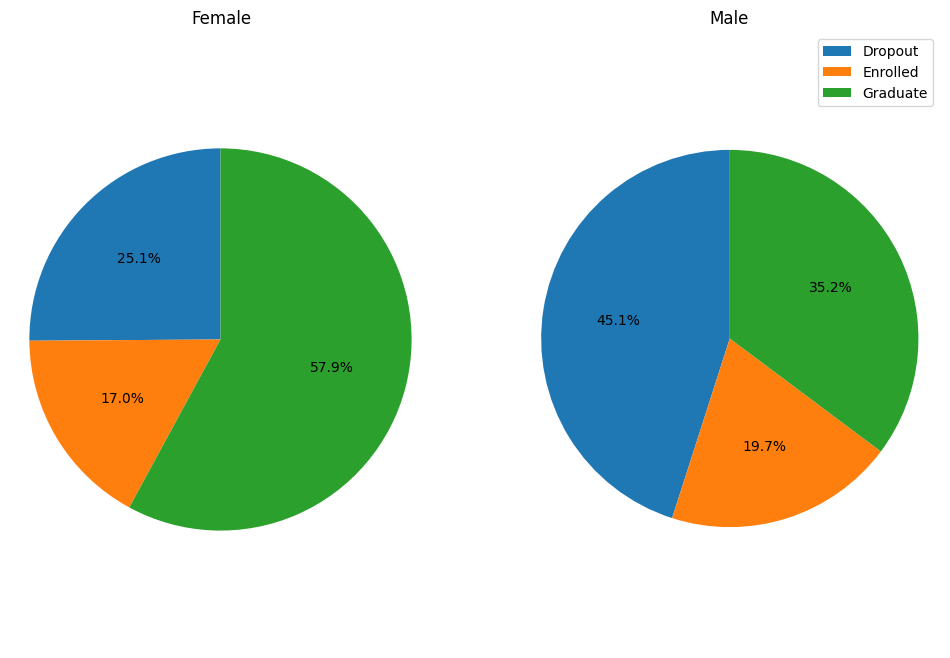

In [ ]:
# Set up the figure and the two subplots (axes)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

categories = ['Dropout', 'Enrolled', 'Graduate']
female_values = [720, 487, 1661]
male_values = [701, 307, 548]

# Plot the first pie chart
ax1.pie(female_values, autopct='%1.1f%%', startangle=90)
ax1.set_title('Female')
ax1.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Plot the second pie chart
ax2.pie(male_values, autopct='%1.1f%%', startangle=90)
ax2.set_title('Male')
ax2.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

plt.legend(categories)
plt.show()


## Stakeholder #2: External Funds & Scholarship

Objective: Evaluate the impact of financial assistance on student retention and target scholarships effectively.
Analysis Focus: Explore the correlation between financial support and dropout rates, emphasizing socio-economic factors or other factors that results to the goals of scholarship funds.
Prediction Use: Predict at-risk students due to financial constraints and assess the potential impact of scholarship programs.
Communication: Share findings on scholarship effectiveness, provide strategies for targeted financial aid and supporting student success.

In [ ]:
def percentage_grapher(x, y, df):
    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('Percentage').reset_index()

    g = sns.catplot(x=x,y='Percentage',hue=y, hue_order = ['Dropout', 'Graduate', 'Enrolled'], kind='bar',data=df1)
    g.ax.set_ylim(0,100)
    plt.xticks(ticks=[0,1], labels=['No','Yes'])

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)

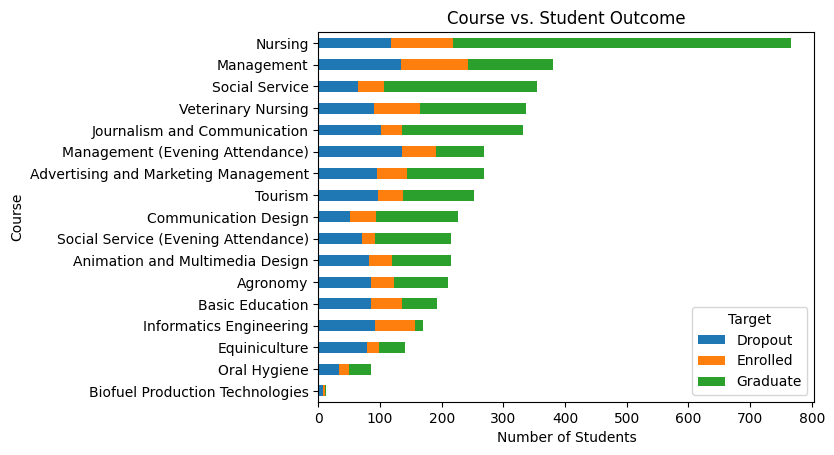

In [ ]:
student_course = df.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

# Let's rename the index of the DataFrame
student_course = student_course.rename(index={
    33:'Biofuel Production Technologies',
    171:'Animation and Multimedia Design',
    8014:'Social Service (Evening Attendance)',
    9003:'Agronomy',9070: 'Communication Design',
    9119:'Informatics Engineering',
    9130:'Equiniculture',
    9147:'Management',
    9238:'Social Service',
    9254:'Tourism',
    9500:'Nursing',
    9556:'Oral Hygiene',
    9670:'Advertising and Marketing Management',
    9773:'Journalism and Communication',
    9853:'Basic Education',
    9991:'Management (Evening Attendance)',
    9085:'Veterinary Nursing'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.title('Course vs. Student Outcome')
plt.xlabel('Number of Students')
plt.show()

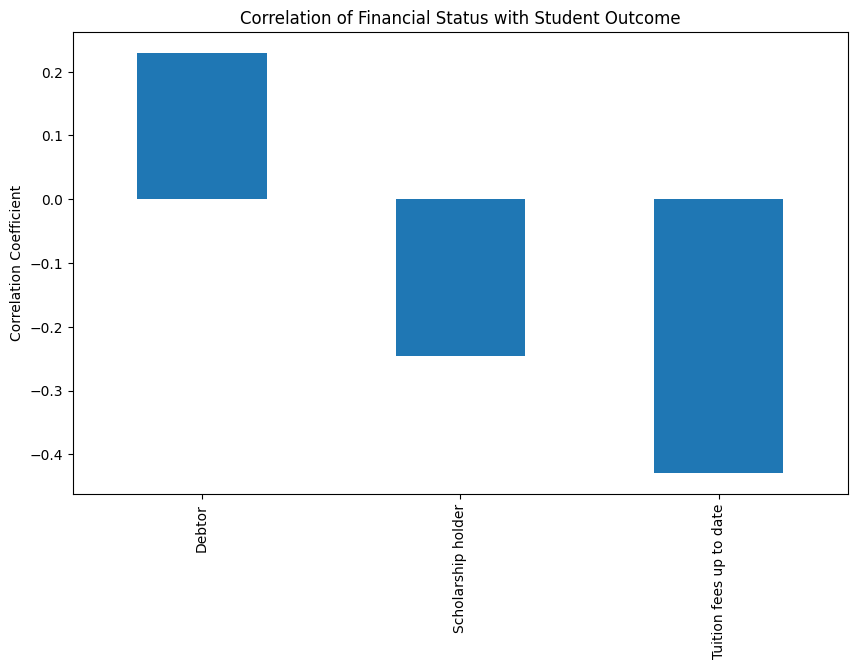

In [ ]:
finance_target_data = df[['Debtor',
       'Tuition fees up to date', 
       'Scholarship holder',
       'Target']]

finance_target_data['Dropped'] = finance_target_data['Target'].map({'Dropout': 1, 'Enrolled': 0, 'Graduate': 0})
correlations = finance_target_data.corr()['Dropped'].sort_values(ascending=False)
correlations = correlations.drop('Dropped')

plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation of Financial Status with Student Outcome')
plt.ylabel('Correlation Coefficient')
plt.show()

Text(0.5, 1.0, 'Percentage of Student Outcome')

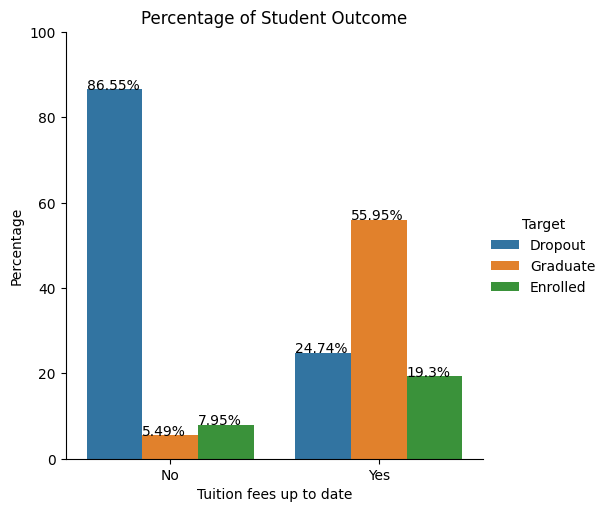

In [ ]:
percentage_grapher("Tuition fees up to date", 'Target', df)
plt.title("Percentage of Student Outcome")

Text(0.5, 1.0, 'Percentage of Student Outcome')

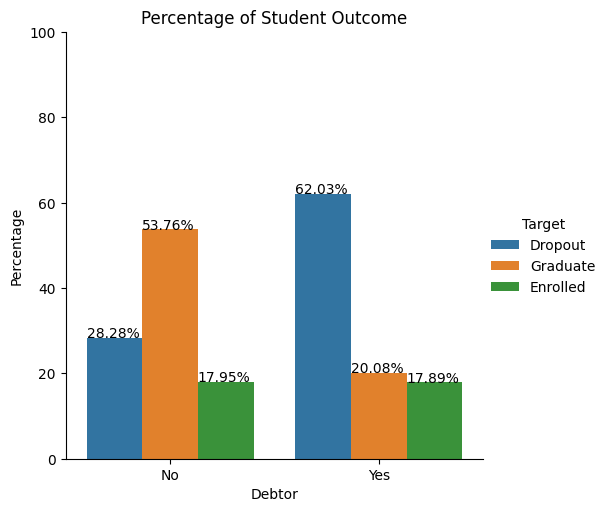

In [ ]:
percentage_grapher("Debtor", 'Target', df)
plt.title("Percentage of Student Outcome")

Text(0.5, 1.0, 'Percentage of Student Outcome')

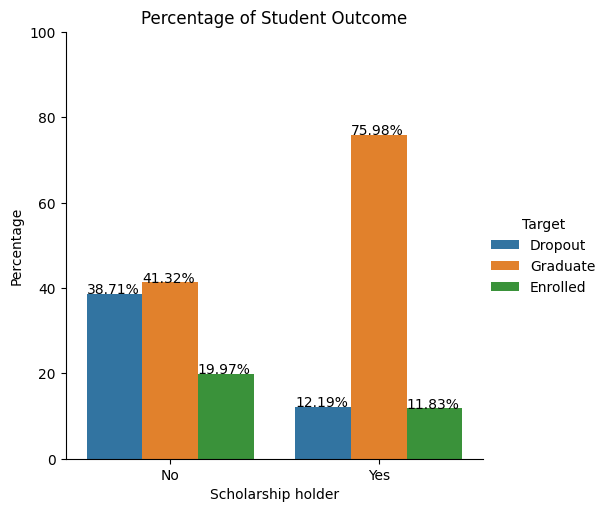

In [ ]:
percentage_grapher("Scholarship holder", 'Target', df)
plt.title("Percentage of Student Outcome")

In [ ]:
parent_education_levels = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd year complementary high school course",
    14: "10th Year of Schooling",
    15: "10th year of schooling - not completed",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-professional course",
    25: "Complementary High School Course - not concluded",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}

occupations = occupational_categories = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative Staff",
    5: "Personal Services, Security and Safety Workers, and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",
    7: "Skilled Workers in Industry, Construction, and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    122: "Health Professionals",
    123: "Teachers",
    125: "Specialists in Information and Communication Technologies (ICT)",
    131: "Intermediate Level Science and Engineering Technicians and Professions",
    132: "Technicians and Professionals, of Intermediate Level of Health",
    134: "Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services",
    141: "Office Workers, Secretaries in General, and Data Processing Operators",
    143: "Data, Accounting, Statistical, Financial Services, and Registry-Related Operators",
    144: "Other Administrative Support Staff",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers and the Like",
    171: "Skilled Construction Workers and the Like, Except Electricians",
    173: "Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans, and the Like",
    175: "Workers in Food Processing, Woodworking, Clothing, and Other Industries and Crafts",
    191: "Cleaning Workers",
    192: "Unskilled Workers in Agriculture, Animal Production, Fisheries, and Forestry",
    193: "Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport",
    194: "Meal Preparation Assistants"
}


In [ ]:
df_words_replace = df.copy()
df_words_replace[["Mother's qualification","Father's qualification","Previous qualification"]] = df_words_replace[["Mother's qualification","Father's qualification","Previous qualification"]].replace(parent_education_levels)
df_words_replace[["Mother's occupation","Father's occupation"]] = df_words_replace[["Mother's occupation","Father's occupation"]].replace(occupations)
df_words_replace

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,Secondary Education - 12th Year of Schooling o...,122.0,1,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,Secondary Education - 12th Year of Schooling o...,160.0,1,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,Secondary Education - 12th Year of Schooling o...,122.0,1,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,Secondary Education - 12th Year of Schooling o...,122.0,1,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,Secondary Education - 12th Year of Schooling o...,100.0,1,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,Secondary Education - 12th Year of Schooling o...,125.0,1,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,Secondary Education - 12th Year of Schooling o...,120.0,105,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,Secondary Education - 12th Year of Schooling o...,154.0,1,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,Secondary Education - 12th Year of Schooling o...,180.0,1,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
df_dropouts = df[df['Target'] == 'Dropout']
df_gradutes = df[df['Target'] == 'Graduate']
df_enroll = df[df['Target'] == 'Enrolled']

In [ ]:
prev_qual = df_words_replace.groupby(["Previous qualification",'Target']).size().reset_index().pivot(columns='Target', index='Previous qualification', values=0).fillna(0)
pre_qual_common = prev_qual.loc[['Technological specialization course', 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 'Higher Education - Degree']]
prev_qual_uncommon = prev_qual.drop(['Secondary Education - 12th Year of Schooling or Eq.','Technological specialization course','Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.','Higher Education - Degree'],inplace=False)

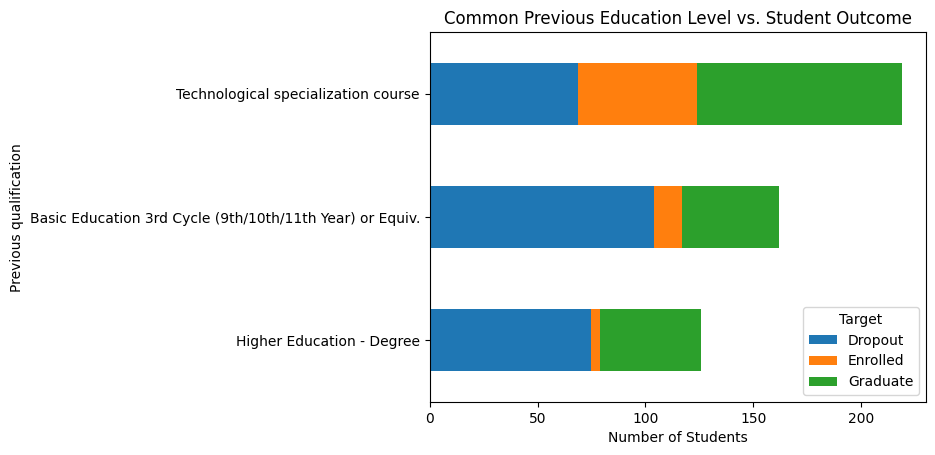

In [ ]:
prev_qual_total = pre_qual_common.sum(axis=1)
prev_qual_sorted = prev_qual_total.sort_values(ascending=True)
prev_qual.loc[prev_qual_sorted.index].plot(kind='barh', stacked=True)

plt.title('Common Previous Education Level vs. Student Outcome')
plt.xlabel('Number of Students')
plt.show()

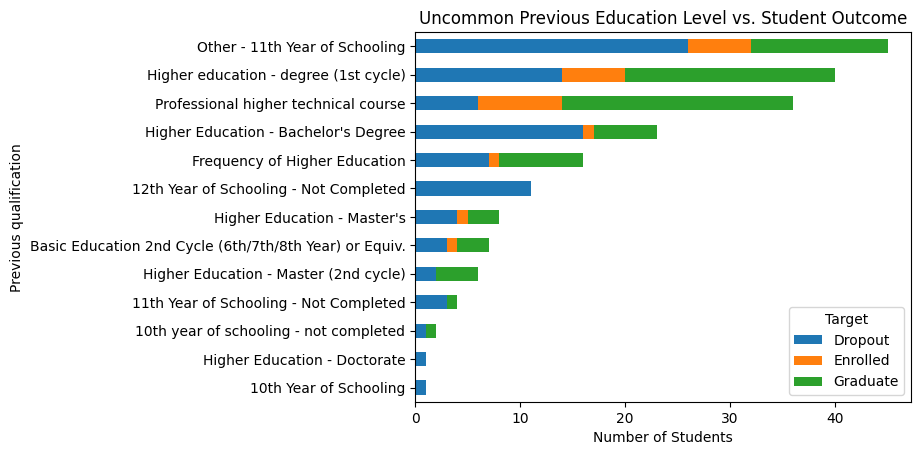

In [ ]:
prev_qual_total = prev_qual_uncommon.sum(axis=1)
prev_qual_sorted = prev_qual_total.sort_values(ascending=True)
prev_qual.loc[prev_qual_sorted.index].plot(kind='barh', stacked=True)

plt.title('Uncommon Previous Education Level vs. Student Outcome')
plt.xlabel('Number of Students')
plt.show()

In [ ]:
hs = prev_qual.loc['Secondary Education - 12th Year of Schooling or Eq.'].reset_index()
hs

,Target,Secondary Education - 12th Year of Schooling or Eq.
0,Dropout,1078.0
1,Enrolled,698.0
2,Graduate,1941.0


In [ ]:
fig = px.pie(hs,
             names ='Target', 
             values ='Secondary Education - 12th Year of Schooling or Eq.',
            title='How many dropouts, enrolled & graduates are there in high school graduates')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

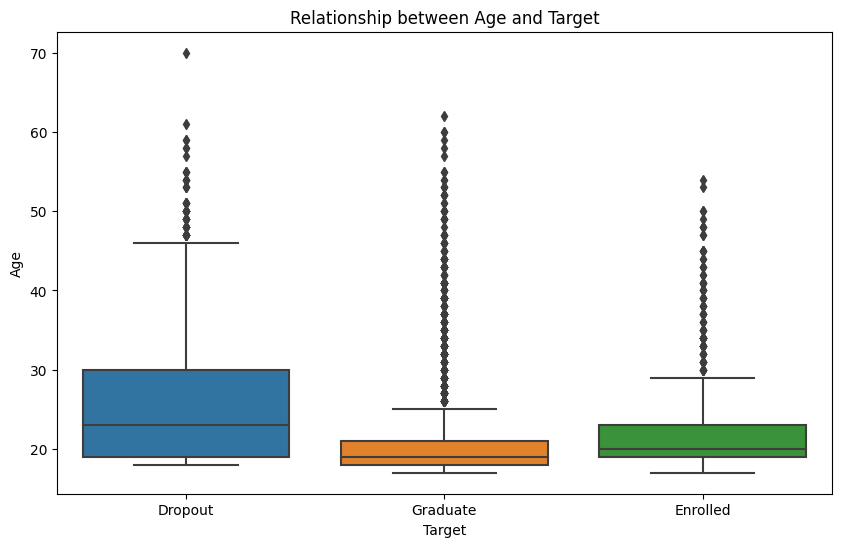

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age at enrollment', data=df)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target')
plt.show()

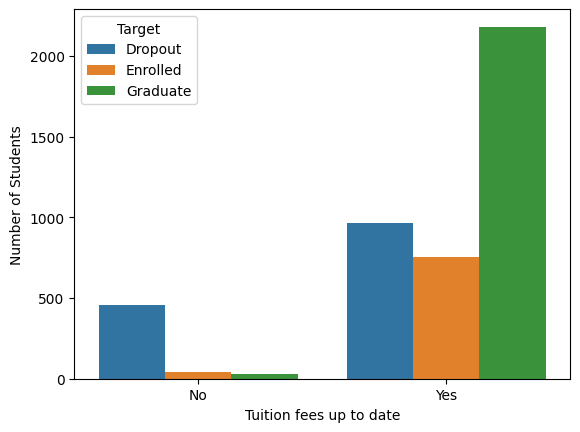

In [ ]:
sns.countplot(data=df, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Tuition fees up to date')
plt.ylabel('Number of Students')
plt.show()

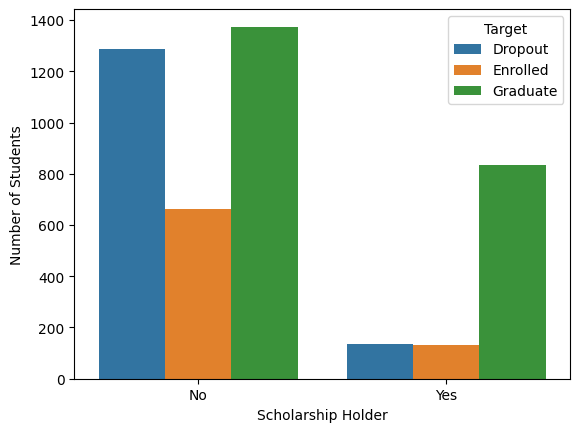

In [ ]:
sns.countplot(data=df, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()

## Stakeholder #3: Professors

Objective: Understand and mitigate factors within the academic environment that contribute to student dropouts.
Analysis Focus: Classroom engagement, course difficulty, student-teacher interactions, and academic performance trends.
Prediction Use: Utilize predictions to identify students who might be struggling academically or not engaging sufficiently in class, allowing for early intervention.
Communication: Provide insights in a manner that respects their expertise and busy schedules. Focus on how they can use predictive data to enhance teaching strategies and student engagement.


Text(0.5, 1.0, 'Enrollment Status by Daytime/Evening Attendance')

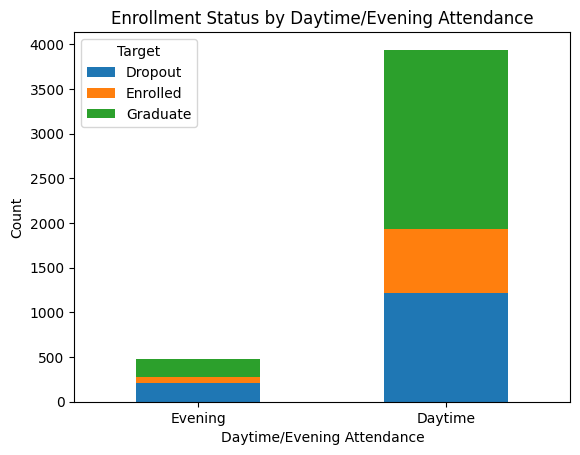

In [ ]:
day_night_count = df.groupby(['Daytime/evening attendance\t', 'Target']).size().unstack(fill_value = 0)
day_night_count.plot(kind = "bar", stacked = True)
plt.xticks(ticks=[0,1], labels=['Evening','Daytime'],rotation = 0)
plt.xlabel('Daytime/Evening Attendance')
plt.ylabel('Count')
plt.title('Enrollment Status by Daytime/Evening Attendance')

Text(0.5, 1.0, 'Percentage of Student Outcome')

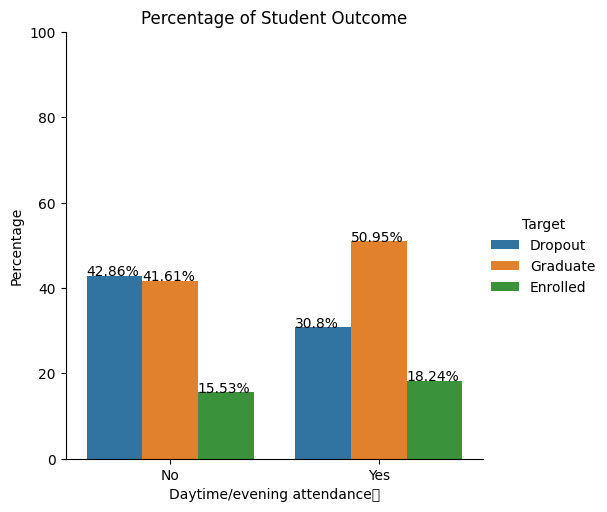

In [ ]:
percentage_grapher("Daytime/evening attendance\t", 'Target', df)
plt.title("Percentage of Student Outcome")

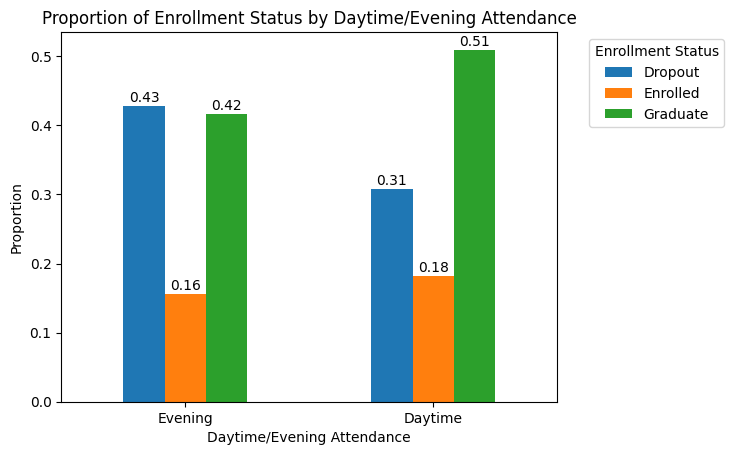

In [ ]:
day_night_prop = day_night_count.div(day_night_count.sum(axis=1), axis=0)
day_night_prop.plot(kind = "bar")
plt.xticks(ticks=[0,1], labels=['Evening','Daytime'],rotation = 0)
plt.xlabel('Daytime/Evening Attendance')
plt.ylabel('Proportion')
plt.title('Proportion of Enrollment Status by Daytime/Evening Attendance')
plt.legend(title='Enrollment Status', bbox_to_anchor=(1.05, 1), loc='upper left')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',  
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points')

plt.show()

# Features

### VIF

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
# calculate Variance Inflation Factor for each explanatory variable
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

In [ ]:
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality',
        "Mother's qualification", "Father's qualification",
        "Mother's occupation", "Father's occupation", 'Admission grade',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment', 'International',
        'Curricular units 1st sem (credited)',
        'Curricular units 1st sem (enrolled)',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP']
VIF(X_train, cols)

Marital status                                     1.448933
Application mode                                   1.787631
Application order                                  1.248175
Course                                             2.485435
Daytime/evening attendance\t                       1.392372
Previous qualification                             1.332597
Previous qualification (grade)                     1.556506
Nacionality                                        2.673609
Mother's qualification                             1.558506
Father's qualification                             1.462371
Mother's occupation                                6.314869
Father's occupation                                6.323261
Admission grade                                    1.622993
Displaced                                          1.317323
Educational special needs                          1.009511
Debtor                                             1.266105
Tuition fees up to date                 

In [ ]:
# Delete 'Curricular units 1st sem (enrolled)'
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality',
        "Mother's qualification", "Father's qualification",
        "Mother's occupation", "Father's occupation", 'Admission grade',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment', 'International',
        'Curricular units 1st sem (credited)',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP']
VIF(X_train, cols)

Marital status                                     1.448931
Application mode                                   1.786623
Application order                                  1.247494
Course                                             2.402730
Daytime/evening attendance\t                       1.391449
Previous qualification                             1.327639
Previous qualification (grade)                     1.555479
Nacionality                                        2.671058
Mother's qualification                             1.558293
Father's qualification                             1.462370
Mother's occupation                                6.314433
Father's occupation                                6.323168
Admission grade                                    1.622943
Displaced                                          1.317250
Educational special needs                          1.009438
Debtor                                             1.265898
Tuition fees up to date                 

In [ ]:
# Delete 'Curricular units 1st sem (credited) '
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality',
        "Mother's qualification", "Father's qualification",
        "Mother's occupation", "Father's occupation", 'Admission grade',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment', 'International',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP']
VIF(X_train, cols)

Marital status                                    1.445007
Application mode                                  1.786597
Application order                                 1.247494
Course                                            2.395779
Daytime/evening attendance\t                      1.390758
Previous qualification                            1.315072
Previous qualification (grade)                    1.554376
Nacionality                                       2.670938
Mother's qualification                            1.558205
Father's qualification                            1.462075
Mother's occupation                               6.313267
Father's occupation                               6.321921
Admission grade                                   1.621678
Displaced                                         1.316596
Educational special needs                         1.009437
Debtor                                            1.265668
Tuition fees up to date                           1.3509

In [ ]:
# Delete 'Curricular units 2nd sem (approved)'
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality',
        "Mother's qualification", "Father's qualification",
        "Mother's occupation", "Father's occupation", 'Admission grade',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment', 'International',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP']
VIF(X_train, cols)

Marital status                                    1.442907
Application mode                                  1.786379
Application order                                 1.244461
Course                                            2.272741
Daytime/evening attendance\t                      1.390033
Previous qualification                            1.313037
Previous qualification (grade)                    1.552789
Nacionality                                       2.668851
Mother's qualification                            1.558162
Father's qualification                            1.462067
Mother's occupation                               6.312289
Father's occupation                               6.320506
Admission grade                                   1.619580
Displaced                                         1.316355
Educational special needs                         1.009415
Debtor                                            1.264113
Tuition fees up to date                           1.3428

In [ ]:
# Delete 'Curricular units 1st sem (approved)'
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality',
        "Mother's qualification", "Father's qualification",
        "Mother's occupation", "Father's occupation", 'Admission grade',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment', 'International',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (grade)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP']
VIF(X_train, cols)

Marital status                                    1.442629
Application mode                                  1.776088
Application order                                 1.243374
Course                                            2.086791
Daytime/evening attendance\t                      1.387889
Previous qualification                            1.312455
Previous qualification (grade)                    1.552666
Nacionality                                       2.668844
Mother's qualification                            1.558100
Father's qualification                            1.461863
Mother's occupation                               6.311161
Father's occupation                               6.315691
Admission grade                                   1.619576
Displaced                                         1.314260
Educational special needs                         1.009304
Debtor                                            1.262555
Tuition fees up to date                           1.3403

In [ ]:
# Delete 'Father's occupation  '
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality',
        "Mother's qualification", "Father's qualification",
        "Mother's occupation", 'Admission grade',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment', 'International',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (grade)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP']
VIF(X_train, cols)

Marital status                                    1.442614
Application mode                                  1.776067
Application order                                 1.243371
Course                                            2.086749
Daytime/evening attendance\t                      1.387878
Previous qualification                            1.311955
Previous qualification (grade)                    1.552499
Nacionality                                       2.666637
Mother's qualification                            1.551340
Father's qualification                            1.456782
Mother's occupation                               1.052172
Admission grade                                   1.619561
Displaced                                         1.312951
Educational special needs                         1.009218
Debtor                                            1.261461
Tuition fees up to date                           1.338723
Gender                                            1.1368

In [ ]:
# Delete 'Curricular units 2nd sem (enrolled) '
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality',
        "Mother's qualification", "Father's qualification",
        "Mother's occupation", 'Admission grade',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment', 'International',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (grade)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP']
VIF(X_train, cols)

Marital status                                    1.442086
Application mode                                  1.775732
Application order                                 1.225578
Course                                            1.448561
Daytime/evening attendance\t                      1.375965
Previous qualification                            1.307392
Previous qualification (grade)                    1.550093
Nacionality                                       2.666619
Mother's qualification                            1.550536
Father's qualification                            1.454893
Mother's occupation                               1.051842
Admission grade                                   1.616649
Displaced                                         1.312871
Educational special needs                         1.008750
Debtor                                            1.261130
Tuition fees up to date                           1.337083
Gender                                            1.1229

In [ ]:
# Delete 'Curricular units 1st sem (grade) '
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality',
        "Mother's qualification", "Father's qualification",
        "Mother's occupation", 'Admission grade',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment', 'International',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP']
VIF(X_train, cols)

Marital status                                    1.441607
Application mode                                  1.762850
Application order                                 1.225489
Course                                            1.407385
Daytime/evening attendance\t                      1.375202
Previous qualification                            1.307313
Previous qualification (grade)                    1.549069
Nacionality                                       2.666440
Mother's qualification                            1.549214
Father's qualification                            1.454818
Mother's occupation                               1.051796
Admission grade                                   1.608901
Displaced                                         1.312809
Educational special needs                         1.008750
Debtor                                            1.260856
Tuition fees up to date                           1.335909
Gender                                            1.1211

In [ ]:
# Delete 'Curricular units 1st sem (evaluations)  '
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality',
        "Mother's qualification", "Father's qualification",
        "Mother's occupation", 'Admission grade',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment', 'International',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP']
VIF(X_train, cols)

Marital status                                    1.441456
Application mode                                  1.759885
Application order                                 1.224408
Course                                            1.367349
Daytime/evening attendance\t                      1.371946
Previous qualification                            1.307280
Previous qualification (grade)                    1.548987
Nacionality                                       2.665816
Mother's qualification                            1.548609
Father's qualification                            1.454706
Mother's occupation                               1.051233
Admission grade                                   1.600169
Displaced                                         1.312323
Educational special needs                         1.008009
Debtor                                            1.257157
Tuition fees up to date                           1.335909
Gender                                            1.1206

In [ ]:
# Delete 'International'
cols = ['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality',
        "Mother's qualification", "Father's qualification",
        "Mother's occupation", 'Admission grade',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP']
VIF(X_train, cols)

Marital status                                    1.439797
Application mode                                  1.758962
Application order                                 1.224041
Course                                            1.367012
Daytime/evening attendance\t                      1.371581
Previous qualification                            1.307084
Previous qualification (grade)                    1.548725
Nacionality                                       1.027064
Mother's qualification                            1.547983
Father's qualification                            1.452988
Mother's occupation                               1.051233
Admission grade                                   1.600132
Displaced                                         1.312003
Educational special needs                         1.007980
Debtor                                            1.254521
Tuition fees up to date                           1.335037
Gender                                            1.1200

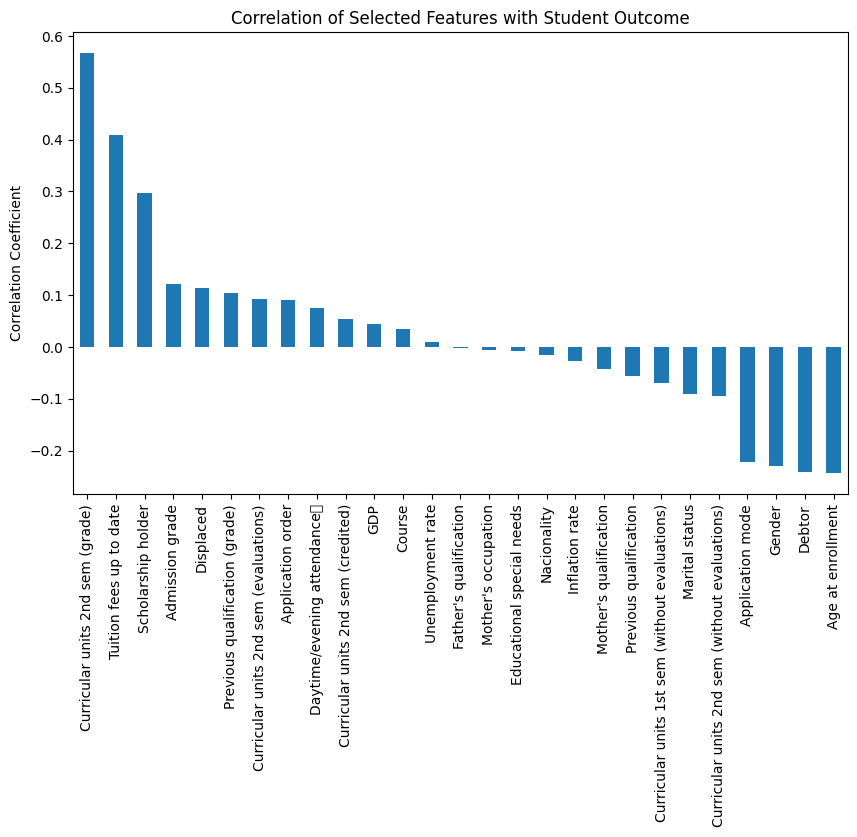

In [ ]:
# Calculate correlations
columns = ['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification',
        'Previous qualification (grade)', 'Nacionality',
        "Mother's qualification", "Father's qualification",
        "Mother's occupation", 'Admission grade',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder',
        'Age at enrollment',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP', 'Target']

selected_df = df[columns]
correlation_matrix = selected_df.corr()

selected_df['Target_numerical'] = selected_df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})
correlations = selected_df.corr()['Target_numerical'].sort_values(ascending=False)
correlations = correlations.drop('Target_numerical')

plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation of Selected Features with Student Outcome')
plt.ylabel('Correlation Coefficient')
plt.show()


In [ ]:
correlations.apply(abs).sort_values(ascending=False)

Curricular units 2nd sem (grade)                  0.566827
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Age at enrollment                                 0.243438
Debtor                                            0.240999
Gender                                            0.229270
Application mode                                  0.221747
Admission grade                                   0.120889
Displaced                                         0.113986
Previous qualification (grade)                    0.103764
Curricular units 2nd sem (without evaluations)    0.094028
Curricular units 2nd sem (evaluations)            0.092721
Marital status                                    0.089804
Application order                                 0.089791
Daytime/evening attendance\t                      0.075107
Curricular units 1st sem (without evaluations)    0.068702
Previous qualification                            0.0560

### Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [ ]:
# top_features = ['Curricular units 2nd sem (grade)', 'Tuition fees up to date',
#        'Scholarship holder', 'Age at enrollment', 'Debtor', 'Gender',
#        'Application mode', 'Admission grade', 'Displaced',
#        'Previous qualification (grade)']

# from sklearn.model_selection import train_test_split

# X = df[top_features]
# y = df['Target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:


# numerical columns: units, age, admission grade, previous qualification (grade)

# categorical columns: tuition fees up to date, scholarship holder, debtor, displaced, 

In [ ]:
# log_X = df[['Curricular units 2nd sem (grade)', 'Age at enrollment', 'Previous qualification (grade)']]
# log_X = np.log(log_X)
# log_X

,Curricular units 2nd sem (grade),Age at enrollment,Previous qualification (grade)
0,-inf,2.995732,4.804021
1,2.614960,2.944439,5.075174
2,-inf,2.944439,4.804021
3,2.517696,2.995732,4.804021
4,2.564949,3.806662,4.605170
...,...,...,...
4419,2.538974,2.944439,4.828314
4420,2.397895,2.890372,4.787492
4421,2.602690,3.401197,5.036953
4422,2.484907,2.995732,5.192957


# Statistical Models

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 76.05 %


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 65.88 %


## logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
X = df.drop('Target', axis=1)  # Features
y = df['Target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.752542372881356
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.83      0.77      0.80       316
    Enrolled       0.45      0.28      0.34       151
    Graduate       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885



In [ ]:
coefficients = model.coef_[0]

feature_names = X.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()

feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

print(feature_importance)

                                           Feature  Importance  \
30             Curricular units 2nd sem (approved)   -1.426316   
28             Curricular units 2nd sem (enrolled)    0.935541   
24             Curricular units 1st sem (approved)   -0.920060   
16                         Tuition fees up to date   -0.534799   
31                Curricular units 2nd sem (grade)   -0.478941   
19                               Age at enrollment    0.289225   
21             Curricular units 1st sem (credited)    0.269738   
27             Curricular units 2nd sem (credited)    0.252573   
10                             Mother's occupation   -0.245146   
3                                           Course    0.228344   
25                Curricular units 1st sem (grade)    0.224173   
20                                   International   -0.203795   
33                               Unemployment rate    0.159373   
7                                      Nacionality    0.156289   
15        

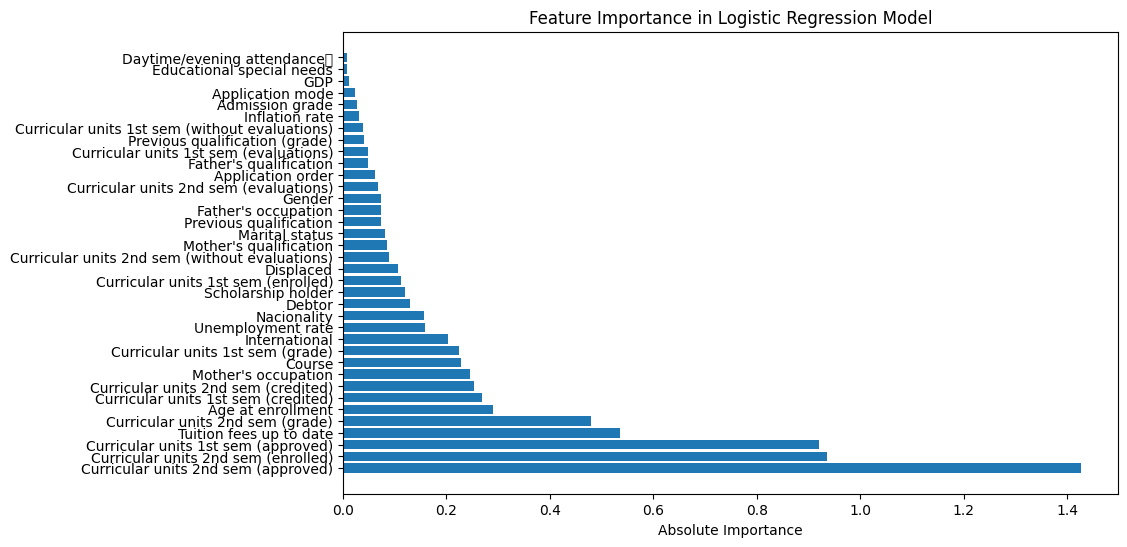

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Absolute Importance'])
plt.xlabel('Absolute Importance')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

In [ ]:
new_features = ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (approved)',
                'Tuition fees up to date', 'Curricular units 2nd sem (grade)', 'Age at enrollment', 'Curricular units 1st sem (credited)',
                'Mother\'s occupation']

In [ ]:
ohe_X_mom = pd.get_dummies(df["Mother's occupation"])
new_X = df[['Curricular units 2nd sem (approved)', 
        'Curricular units 2nd sem (enrolled)', 
        'Curricular units 1st sem (approved)',
        'Tuition fees up to date', 'Curricular units 2nd sem (grade)', 
        'Age at enrollment', 'Curricular units 1st sem (credited)']]
new_X = pd.concat([new_X, ohe_X_mom], axis = 1)

In [ ]:
numerical = df[['Curricular units 2nd sem (approved)', 
        'Curricular units 2nd sem (enrolled)', 
        'Curricular units 1st sem (approved)','Tuition fees up to date', 
        'Curricular units 2nd sem (grade)', 'Age at enrollment', 'Curricular units 1st sem (credited)']]
scaler = StandardScaler()
numerical_standardized = scaler.fit_transform(numerical)
numerical_df_standardized = pd.DataFrame(numerical_standardized, columns=numerical.columns)
new_X_2 = pd.concat([numerical_df_standardized, ohe_X_mom], axis = 1)
new_X_2

,Curricular units 2nd sem (approved),Curricular units 2nd sem (enrolled),Curricular units 1st sem (approved),Tuition fees up to date,Curricular units 2nd sem (grade),Age at enrollment,Curricular units 1st sem (credited),0,1,2,...,151,152,153,171,173,175,191,192,193,194
0,-1.471527,-2.838337,-1.521257,0.368135,-1.963489,-0.430363,-0.300813,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.518904,-0.105726,0.418050,-2.716392,0.659562,-0.562168,-0.300813,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.471527,-0.105726,-1.521257,-2.716392,-1.963489,-0.562168,-0.300813,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.187165,-0.105726,0.418050,0.368135,0.416450,-0.430363,-0.300813,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.518904,-0.105726,0.094832,0.368135,0.531608,2.864765,-0.300813,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.187165,-0.105726,0.094832,0.368135,0.467631,-0.562168,-0.300813,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4420,-0.808050,-0.105726,0.418050,-2.716392,0.147747,-0.693973,-0.300813,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4421,-1.139788,0.805144,0.741268,0.368135,0.627573,0.887688,-0.300813,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4422,0.187165,-0.561161,0.094832,0.368135,0.339678,-0.430363,-0.300813,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Replace all 'Graduate' with "Enrolled"
df['Target'] = df['Target'].replace('Graduate', 'Enrolled', regex=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X = df[new_features] # Features
# y = encoder.fit_transform(df['Target']) 
y = df['Target']


X_train, X_test, y_train, y_test = train_test_split(new_X_2, y, test_size=0.2, random_state=42)


# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8587570621468926
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.87      0.71      0.78       316
    Enrolled       0.85      0.94      0.90       569

    accuracy                           0.86       885
   macro avg       0.86      0.83      0.84       885
weighted avg       0.86      0.86      0.86       885



# Include gender, scholarship, day+evening attendance

In [ ]:
new_features_2 = ['Curricular units 2nd sem (approved)',  'Curricular units 1st sem (approved)',
               'Tuition fees up to date', 'Age at enrollment', 'Gender','Daytime/evening attendance	',
               'Mother\'s occupation', 'Scholarship holder', 'Curricular units 2nd sem (enrolled)',
                'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (credited)',
                'Mother\'s occupation']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X = df[new_features_2] # Features
# y = encoder.fit_transform(df['Target']) 
y = df['Target']


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_2, y_train_2)

# Predict on the test set
y_pred_2 = model.predict(X_test_2)

# Evaluate the model
accuracy = accuracy_score(y_test_2, y_pred_2)
report = classification_report(y_test_2, y_pred_2)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8621468926553673
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.87      0.72      0.79       316
    Enrolled       0.86      0.94      0.90       569

    accuracy                           0.86       885
   macro avg       0.86      0.83      0.84       885
weighted avg       0.86      0.86      0.86       885



## Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.847457627118644

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.71      0.77       316
    Enrolled       0.85      0.92      0.89       569

    accuracy                           0.85       885
   macro avg       0.85      0.82      0.83       885
weighted avg       0.85      0.85      0.84       885



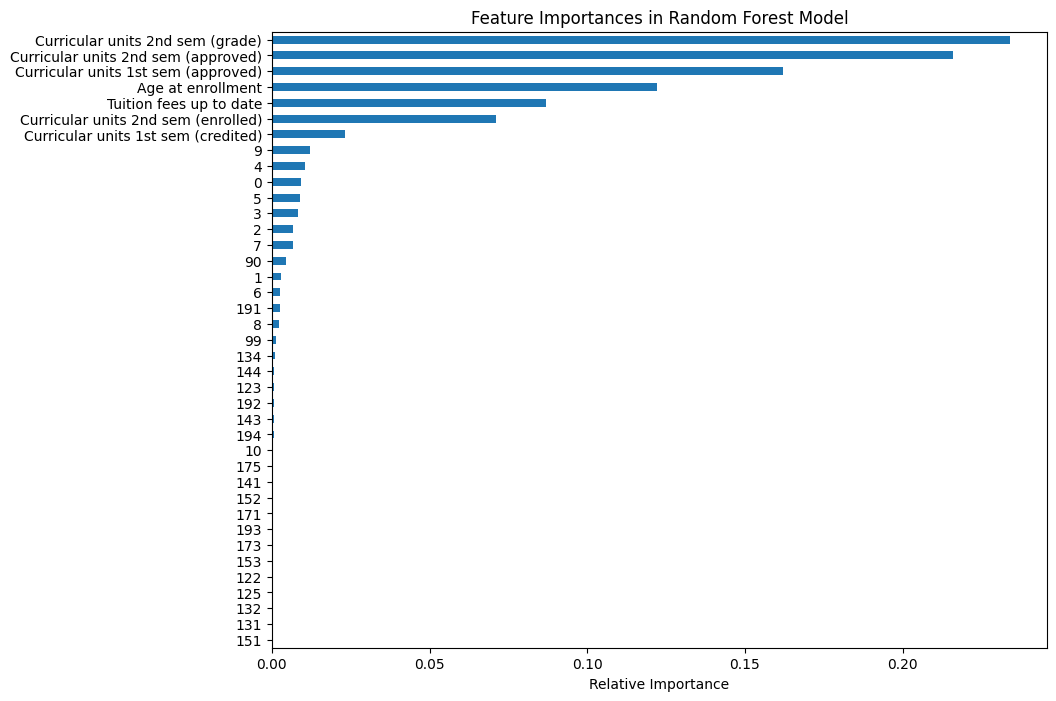

In [ ]:
# Retrieve feature importances and pair with column names
feature_importances = pd.DataFrame(rf_model.feature_importances_, index = new_X_2.columns, columns=['importance']).sort_values('importance', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
feature_importances['importance'].plot(kind='barh')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Cross Validation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, 
                scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.8519774011299435

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.71      0.77       316
    Enrolled       0.85      0.93      0.89       569

    accuracy                           0.85       885
   macro avg       0.85      0.82      0.83       885
weighted avg       0.85      0.85      0.85       885



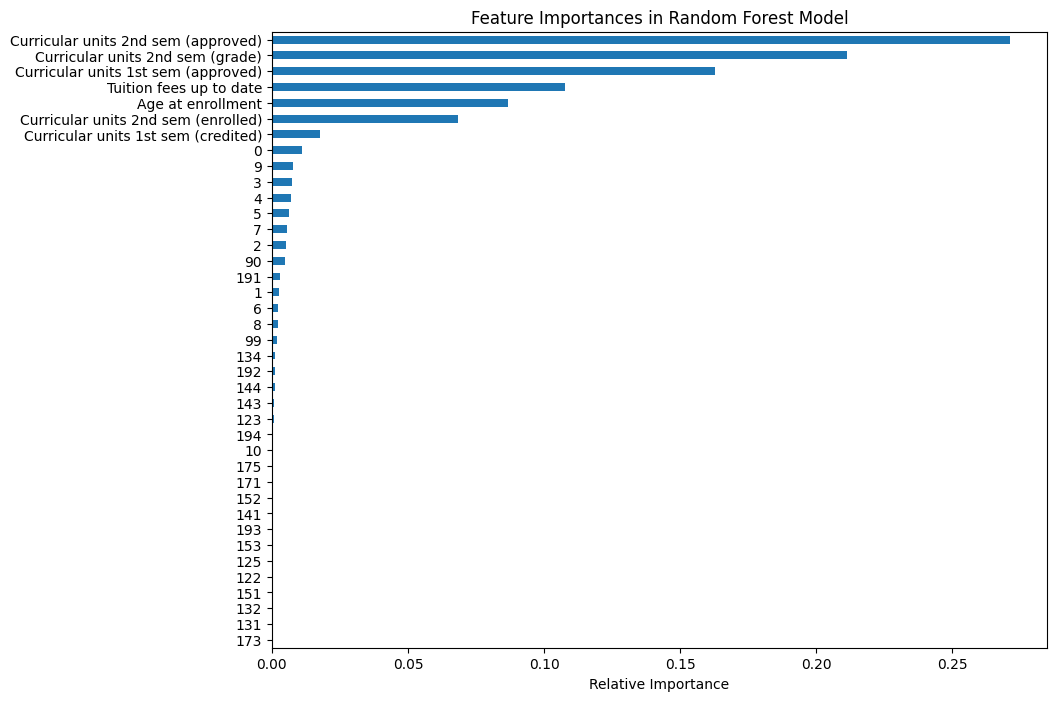

In [ ]:
# Retrieve feature importances and pair with column names
feature_importances = pd.DataFrame(best_rf_model.feature_importances_, index = new_X_2.columns, columns=['importance']).sort_values('importance', ascending=True)

# Plot
plt.figure(figsize=(10, 8))
feature_importances['importance'].plot(kind='barh')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Relative Importance')
plt.show()

### Decision Tree

In [ ]:
! pip install graphviz
!pip install pydotplus==2.0.2
! pip install pydot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 8.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
clf = DecisionTreeClassifier(max_depth = 5)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8361581920903954


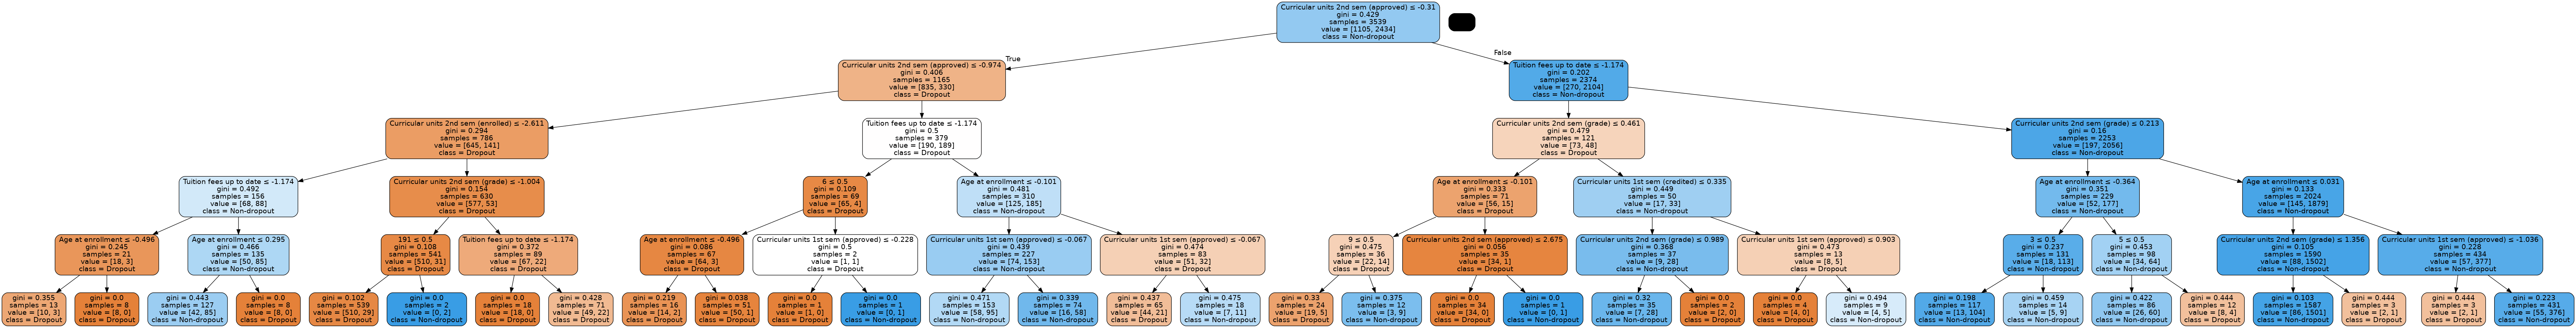

In [ ]:
from IPython.display import Image
import pydotplus
import pydot
from six import StringIO
from sklearn import tree

clf = clf
dotfile = StringIO()
tree.export_graphviz(clf, out_file=dotfile,
                      feature_names=new_X_2.columns,
                          class_names=['Dropout', 'Non-dropout'],
                          filled=True, rounded=True,
                          special_characters=True)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=849dc415-d0e6-4399-8dd9-7f4520e2a399' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>